In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from pypinyin import pinyin, lazy_pinyin, Style

In [2]:
def word_to_py(word):
    temp = pinyin(word,style=Style.FIRST_LETTER)
    result = ""
    for one_word in [_[0] for _ in temp]:
        result+=str(one_word).upper()
    return result

In [3]:
# 决策树保存路径
model_path = r"D:\ArcgisData\pred_tl\pred_moudle\tree"
model_name = "tree_acc.pkl"

In [4]:
dataset = pd.read_csv(r"../../../data/csv_file/feature_table_result.csv")
dataset.dropna(inplace=True)
dataset.columns

Index(['亚类', '土属', '土种', '土类', 'DEM', 'TWI5', 'TPI201', 'TPI101', 'TPI11',
       'TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE', 'NIGTH', 'NDVI', 'CUR', 'ASP',
       'PLCUR', 'POCUR', 'LON', 'LAT', 'PH', 'DL', 'SC', 'SC2', 'OSJL', 'SOM',
       'DZ'],
      dtype='object')

In [5]:
# dataset["土类"] = word_to_py(dataset["土类"])
dataset["TL"] =dataset['土类'].apply(word_to_py)
dataset["YL"] =dataset['亚类'].apply(word_to_py)
dataset["TS"] =dataset['土属'].apply(word_to_py)
dataset["TZ"] =dataset['土种'].apply(word_to_py)
dataset

,亚类,土属,土种,土类,DEM,TWI5,TPI201,TPI101,TPI11,TPI3,...,DL,SC,SC2,OSJL,SOM,DZ,TL,YL,TS,TZ
0,酸性紫色土,黏质酸性紫色土,低黏质酸性紫色土,紫色土,1270.5,8.513925,20.920898,-20.338257,-4.790527,-0.400513,...,2.0,1.0,3,247.487380,27.312786,1,ZST,SXZST,NZSXZST,DNZSXZST
1,中性紫色土,黏质中性紫色土,中黏质中性紫色土,紫色土,1162.7,6.150497,-70.393555,-31.960815,-1.263062,-0.061768,...,2.0,3.0,2,5.000000,27.487282,1,ZST,ZXZST,NZZXZST,ZNZZXZST
2,中性紫色土,壤质中性紫色土,高壤质中性紫色土,紫色土,1075.5,3.867191,-51.974365,-19.442627,2.042603,0.261963,...,2.0,3.0,2,74.330345,35.349170,1,ZST,ZXZST,RZZXZST,GRZZXZST
3,酸性紫色土,壤质酸性紫色土,中壤质酸性紫色土,紫色土,1124.5,3.831816,-47.574097,-9.847290,0.463257,0.014404,...,2.0,3.0,2,32.015620,32.940200,1,ZST,SXZST,RZSXZST,ZRZSXZST
4,酸性紫色土,黏质酸性紫色土,低黏质酸性紫色土,紫色土,1013.1,7.125938,-45.481323,-9.782227,0.113464,0.001221,...,2.0,3.0,2,81.394104,29.642498,1,ZST,SXZST,NZSXZST,DNZSXZST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,潴育型水稻土,紫泥田,高紫泥田,水稻土,963.9,7.160609,-18.000061,-17.237854,-0.721375,-0.037231,...,1.0,2.0,1,44.721360,35.207450,1,SDT,ZYXSDT,ZNT,GZNT
2270,潴育型水稻土,紫泥田,高紫泥田,水稻土,907.3,6.441805,-54.408203,-19.711853,-0.410095,-0.031311,...,1.0,2.0,1,70.000000,38.183678,1,SDT,ZYXSDT,ZNT,GZNT
2271,潴育型水稻土,紫泥田,高紫泥田,水稻土,919.7,10.804166,-64.129456,-42.702820,-0.952087,-0.065735,...,1.0,2.0,1,40.311287,33.912180,1,SDT,ZYXSDT,ZNT,GZNT
2272,潴育型水稻土,紫泥田,高紫泥田,水稻土,944.7,9.232461,-48.497375,-24.980103,-0.173157,-0.006958,...,1.0,2.0,1,20.615528,31.535320,1,SDT,ZYXSDT,ZNT,GZNT


In [6]:
features = ['TL', 'YL', 'TS', 'TZ', 'DEM', 'TWI5', 'TPI201', 'TPI101', 'TPI11','TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE', 'NIGTH', 'NDVI', 'CUR', 'ASP','PLCUR', 'POCUR', 'LON', 'LAT', 'PH', 'DL', 'SC', 'OSJL', 'SOM','DZ']

In [7]:
dataset["SC_label"] = dataset.SC.astype("category").cat.codes
dataset["DL_label"] = dataset.DL.astype("category").cat.codes
dataset["DZ_label"] = dataset.DZ.astype("category").cat.codes
dataset["TL_label"] = dataset.TL.astype("category").cat.codes


In [8]:
result = dataset.groupby('TL_label')["TL"].apply(lambda x: list(x.unique())).to_dict()
result

{0: ['HR'], 1: ['HZR'], 2: ['SDT'], 3: ['SHT'], 4: ['ZST']}

In [9]:
features = ['DEM', 'TWI5', 'TPI201', 'TPI101', 'TPI11','TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE', 'NIGTH', 'NDVI', 'CUR', 'ASP','PLCUR', 'POCUR', 'LON', 'LAT', 'PH', 'DL', 'SC', 'OSJL', 'SOM','DZ']
target = "TL_label"

In [10]:
X = dataset[features]
y = dataset[target]
# 分割训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 通过网格搜索找到最优超参数
params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100))} 
grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid_tree.fit(Xtrain, ytrain)
print(grid_tree.best_params_)

{'criterion': 'gini', 'max_depth': 7}


In [20]:

random_state = 42
# tree_classifier = DecisionTreeClassifier(random_state=42,**grid_tree.best_params_)
tree_classifier = DecisionTreeClassifier(random_state=42,criterion='gini', max_depth=5)
tree_classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
# 保存模型
with open(os.path.join(model_path,model_name), 'wb') as f:
    pickle.dump(tree_classifier, f)
    
# 加载模型
with open(os.path.join(model_path,model_name), 'rb') as f:
    predictor = pickle.load(f)

In [22]:
predictor = tree_classifier
# 查看准确率
y_test_pred= predictor.predict(Xtest)
y_train_pred = predictor.predict(Xtrain)
accuracy_test = accuracy_score(ytest,y_test_pred)
accuracy_train = accuracy_score(ytrain,y_train_pred)
print(accuracy_train,accuracy_test)

0.9114898295766904 0.9120879120879121


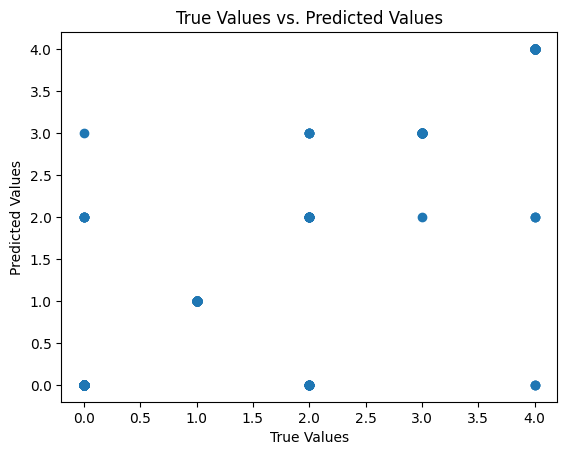

In [23]:
# 预测散点图
plt.scatter(ytest.values, y_test_pred)

# 添加标签和标题
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# 显示图表
plt.show()

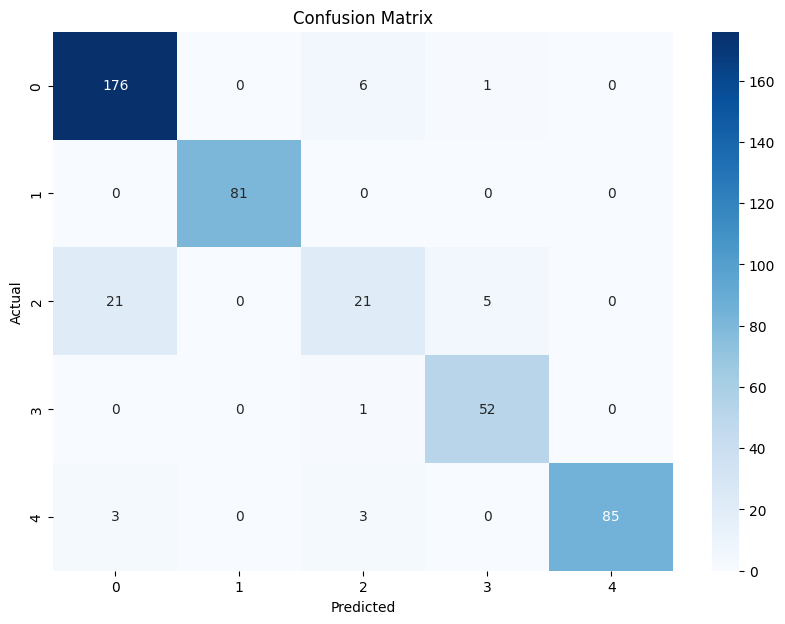

In [24]:
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

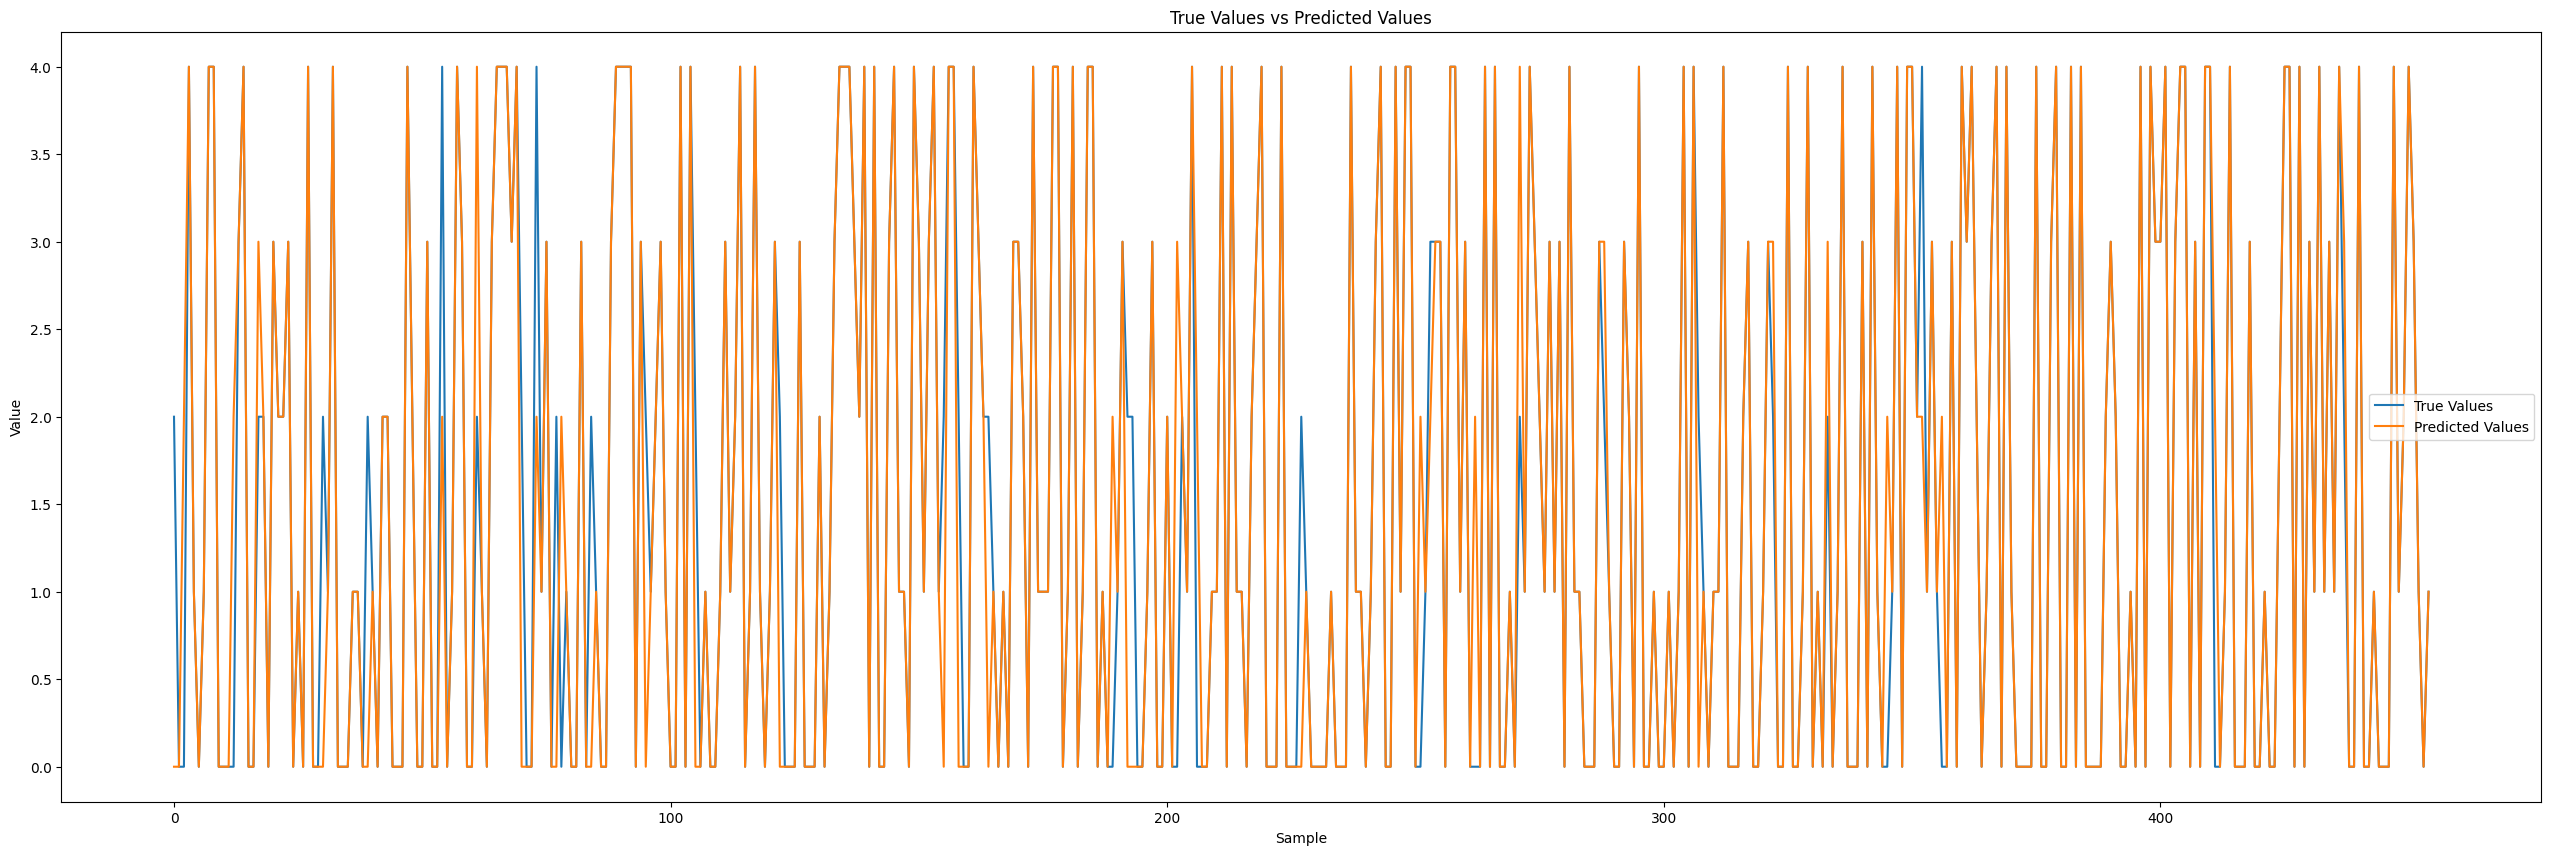

In [17]:
# 创建折线图
plt.figure(figsize=(32,10))
plt.plot(ytest.values, label='True Values')
plt.plot(y_test_pred, label='Predicted Values')

# 图表标题和标签
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [14]:
# 剪枝

In [25]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target, class_names= ['HR','HZR', 'SDT','SHT', 'ZST'])

d:\worker_code\.venvgis\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


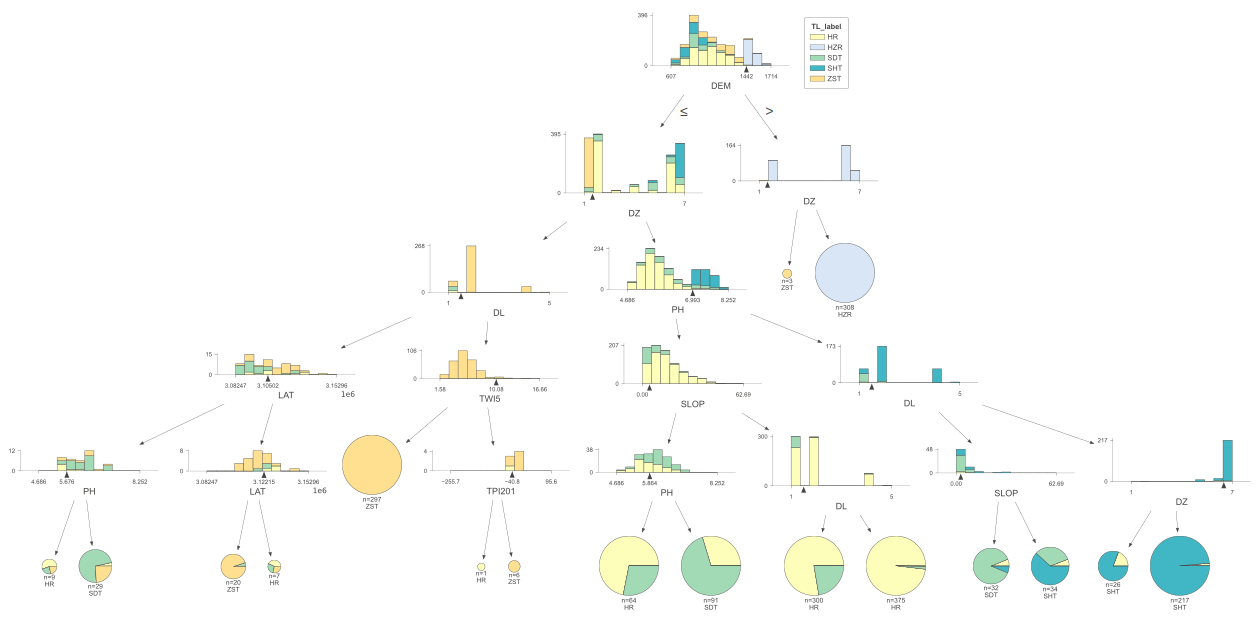

In [26]:
viz_model.view()

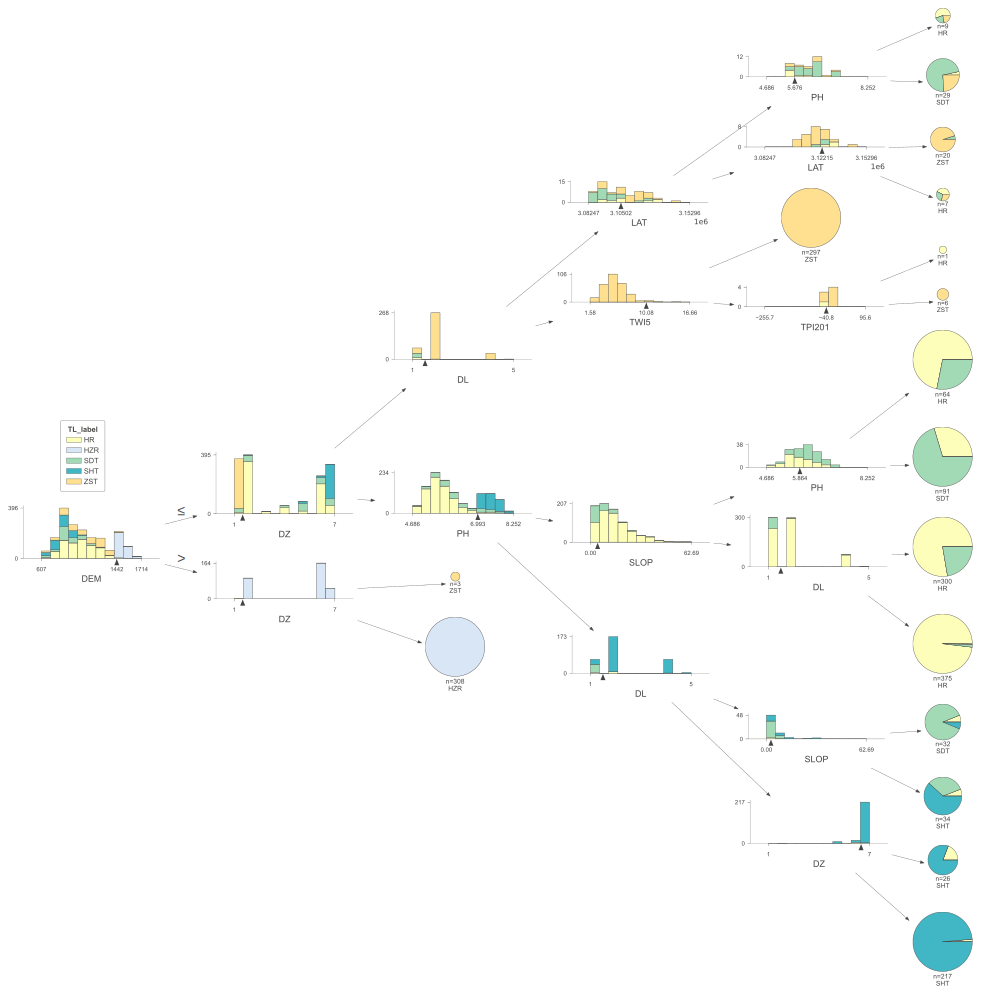

In [35]:
viz_model.view(orientation="LR")

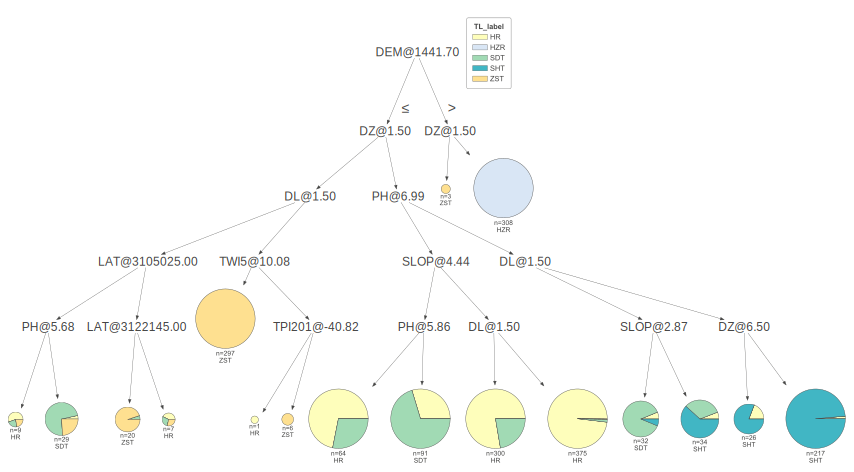

In [36]:
viz_model.view(fancy=False)